In [1]:
%matplotlib inline

# 데이터셋과 데이터로더

데이터 샘플을 전처리하기 위한 코드는 쉽게 지저분해지고 유지 관리가 어려울 수 있어, 더 나은 가독성과 모듈화를 위해 데이터와 관련된 코드를 모델 훈련 코드에서 분리하는 것이 이상적입니다. 이에 대해 PyTorch는 기본적으로 두 종류의 데이터 함수인 ``torch.utils.data.DataLoader``와 ``torch.utils.data.Dataset``을 제공합니다. 
``torch.utils.data.DataLoader`` 및 ``torch.utils.data.Dataset``을 사용하면 pre-loaded 데이터 샘플 및 사용자만의 데이터를 사용할 수 있습니다.
구체적으로 ``torch.utils.data.Dataset``은 사용하고자 하는 데이터 샘플 및 해당 샘플의 레이블을 저장하고, ``torch.utils.data.DataLoader``는 ``torch.utils.data.Dataset``의 레이블을 이용하여 데이터 샘플에 쉽게 접근할 수 있도록 합니다.

PyTorch 도메인 라이브러리는 ``torch.utils.data.Dataset``을 다수의 하위 클래스를 통해 pre-loaded 데이터 샘플(예 : FashionMNIST)을 제공합니다. 이를 이용하여 모델의 prototype을 만들고, 벤치마킹(benchmark)하는 데 사용할 수 있습니다. 하위 클래스에 대한 내용은 아래 링크에서 찾으실 수 있습니다


[Image Datasets](https://pytorch.org/vision/stable/datasets.html) / 
[Text Datasets](https://pytorch.org/text/stable/datasets.html) / 
[Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

## 데이터셋 불러오기

다음은 TorchVision에서 [Fashion-MNIST] (https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) 데이터셋을 로드하는 방법의 예입니다.
Fashion-MNIST는 60,000 개의 학습 예제와 10,000 개의 테스트 예제로 구성된 Zalando의 기사 이미지 데이터셋입니다.
각 예제는 28x28 그레이 스케일 이미지와 10 개 클래스 중 하나의 관련 레이블로 구성됩니다.

다음 파라미터를 사용하여 [FashionMNIST 데이터 세트](https://pytorch.org/vision/stable/datasets.html#fashion-mnist)를 불러옵니다:
 - `root` : 훈련 및 테스트 데이터셋이 저장되는 경로입니다.
 - `train` : 훈련 또는 테스트셋을 지정합니다.
 - `download=True` : `root`에서 불러올 수 없는 경우 인터넷을 통해 데이터를 다운로드합니다.
 - `transform` & `target_transform` : 변수(Feature) 및 레이블 변환을 지정합니다.

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Using downloaded and verified file: data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw
Using downloaded and verified file: data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Using downloaded and verified file: data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw
Using downloaded and verified file: data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370141920/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


데이터셋 반복 및 시각화
-----------------

``training_data [index]``목록처럼 수동으로``Datasets``를 인덱싱 할 수 있습니다.
훈련 데이터에서 일부 샘플을 시각화하기 위해``matplotlib``를 사용합니다.



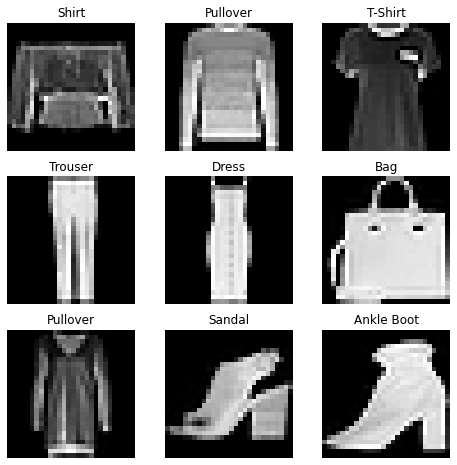

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

사용자 지정 데이터셋 생성
---------------------------------------------------

사용자 지정 데이터셋 클래스는`__init__`,`__len__`,`__getitem__`의 세 가지 함수를 구현해야합니다.
아래 구현을 살펴보면, Fashion MNIST 이미지는 ``img_dir`` 디렉토리에 저장되고, 레이블은 CSV 파일``annotations_file``에 별도로 저장됩니다.

다음 섹션에서는 이러한 각 함수에 대해 자세히 살펴보겠습니다.

In [4]:
import os
import pandas as pd
import torchvision.io as tvio

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

## init

`__init__` 함수는 데이터 세트를 인스턴스화 할 때 한 번 실행됩니다. 이미지, 주석 파일 및 두 변환 모두를 포함하는 디렉토리를 초기화합니다 (다음 섹션에서 자세히 다룹니다).

예를 들어 label.csv 파일이 아래와 같이 생겼다면
```

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9
```
`__init__`은 아래와 같이 설정해줍니다.
```
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
```

## len

`__len__` 함수는 데이터 세트의 샘플 수를 반환합니다.

```
def __len__(self):
    return len(self.img_labels)
```


## getitem

`__getitem__` 함수는 주어진 인덱스 `idx`의 데이터 세트에서 샘플을 불러와 반환합니다. 인덱스를 기반으로 디스크에서 이미지의 위치를 식별하고, `read_image`를 사용하여 Tensor로 변환하고, `self.img_labels`의 csv 데이터에서 해당 레이블을 검색하고, 변환 함수(해당되는 경우)를 호출하고, `Dict`에서 Tensor 이미지와 해당 레이블을 반환합니다.

```
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample
```

데이터로더 학습을 위한 데이터 준비
-------------------------------------------------

``Dataset``는 데이터셋의 변수(Feature)를 검색하고 한 번에 한 샘플에 레이블을 지정합니다. 모델을 훈련하는 동안 우리는 일반적으로 "미니배치(minibatches)"로 샘플을 전달하고, 모델의 과적합을 줄이기 위해 epoch마다 데이터를 재구성(reshuffle)하며, 데이터 검색 속도를 높이기 위해 파이썬의 "다중 처리(`multiprocessing`)"를 사용하려고 합니다.

``DataLoader``는 쉬운 API로 이러한 복잡성을 단순화시키는 반복 기능입니다.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 데이터로더를 통해 반복


해당 데이터셋을 데이터로더에 불러왔으며, 필요에 따라 데이터셋을 불러오는 것을 반복할 수 있습니다. 아래의 각 반복은 `train_features` 및 `train_labels`의 배치(`batch_size = 64`이며, 변수(feature) 및 레이블을 포함)를 반환합니다. `shuffle = True`로 지정했기 때문에 모든 배치를 반복한 후 데이터가 섞입니다(데이터를 불러오는 순서를 보다 세밀하게 제어하려면 [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler>)를 살펴보십시오.)

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")